# 分析IRAs

In [3]:
from my_weapon import *
import seaborn as sns
sns.set_style('white')

In [4]:
user_data = pd.read_csv('data/ira_users_csv_hashed.csv')
user_data.head()

userid  \
0  94c383089f0dd9993020276bd01113ecb5935ad860bfa6...   
1  799bb58d3c064d3884fdc4604c74068ff059b60c0b3464...   
2  0d33d19fbadccaad0033a0a0d6ec7f9919e21da60ea958...   
3  efbe6ab452cf84134d5e7764cc1ce176067c8224fd8868...   
4  d1e5ee3856d4af872b7bb31638fb86fa0a8ee3287d8ca8...   

                                   user_display_name  \
0  94c383089f0dd9993020276bd01113ecb5935ad860bfa6...   
1  799bb58d3c064d3884fdc4604c74068ff059b60c0b3464...   
2  0d33d19fbadccaad0033a0a0d6ec7f9919e21da60ea958...   
3  efbe6ab452cf84134d5e7764cc1ce176067c8224fd8868...   
4  d1e5ee3856d4af872b7bb31638fb86fa0a8ee3287d8ca8...   

                                    user_screen_name  \
0  94c383089f0dd9993020276bd01113ecb5935ad860bfa6...   
1  799bb58d3c064d3884fdc4604c74068ff059b60c0b3464...   
2  0d33d19fbadccaad0033a0a0d6ec7f9919e21da60ea958...   
3  efbe6ab452cf84134d5e7764cc1ce176067c8224fd8868...   
4  d1e5ee3856d4af872b7bb31638fb86fa0a8ee3287d8ca8...   

         user_reported_location  \
0                           USA   
1                          Раша   
2  Чеченская республика, Россия   
3                            US   
4                           NaN   

                            user_profile_description user_profile_url  \
0  Conservative. Politics. Pro-Life. Writer.  #Go...              NaN   
1                              На воре и шапка горит              NaN   
2  Я никогда не хотел стать президентом. У меня в...              NaN   
3                               ❥ ❣ my sweethearts))              NaN   
4                                                NaN              NaN   

   follower_count  following_count account_creation_date account_language  
0            1541             1676            2014-06-13               en  
1             299              324            2013-12-22               en  
2            4094                0            2016-11-25               ru  
3             140              191            2013-08-11               en  
4             119             1152            2016-07-06               de

In [9]:
user_data.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

In [10]:
user_data.describe()

follower_count  following_count
count     3836.000000      3836.000000
mean      1664.950209       826.092023
std       8860.043408      2726.252326
min          0.000000         0.000000
25%         58.000000       104.000000
50%        126.000000       239.000000
75%        461.250000       542.000000
max     257638.000000     74664.000000

In [11]:
# %matplotlib inline

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

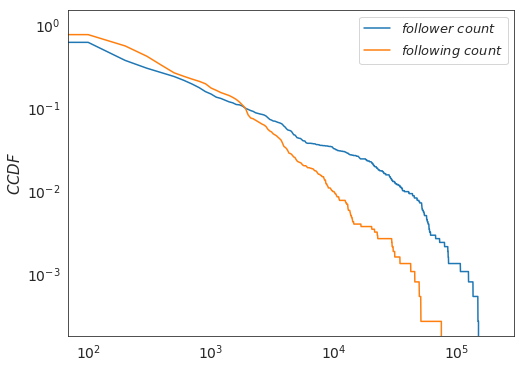

In [26]:
# user_data
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(user_data['follower_count'], 0, 200000, 100)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='$follower\ count$')

pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_follower_count.csv')


x, cdf, pdf = get_cdf_pdf(user_data['following_count'], 0, 100000, 100)
plt.ylabel('$CCDF$', fontsize=15)
pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_following_count.csv')


plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xscale('log'); plt.yscale('log')

plt.plot(x, cdf, label='$following\ count$')
plt.legend(fontsize=13)
plt.savefig('fig/fol.pdf', dpi=300)
plt.show()



In [23]:
user_data.iloc[user_data['follower_count'].idxmax(), :]

userid                                                             2527472164
user_display_name                                              Вестник Москвы
user_screen_name                                                   NovostiMsk
user_reported_location                                                 Москва
user_profile_description    Невозможно не любить этот город! Телефон редак...
user_profile_url                                      https://t.co/sIJZDK1hTI
follower_count                                                         257638
following_count                                                           544
account_creation_date                                     2014-05-04 00:00:00
account_language                                                           en
Name: 1014, dtype: object

In [24]:
user_data.iloc[user_data['following_count'].idxmax(), :]

userid                                                             4224729994
user_display_name                                                   Tennessee
user_screen_name                                                      TEN_GOP
user_reported_location                                                    NaN
user_profile_description    Unofficial Twitter of Tennessee Republicans. C...
user_profile_url                                                          NaN
follower_count                                                         147767
following_count                                                         74664
account_creation_date                                     2015-11-19 00:00:00
account_language                                                           en
Name: 2642, dtype: object

In [15]:
# user_data.groupby('account_creation_date').count()
user_data['account_creation_date'] = pd.to_datetime(user_data['account_creation_date'])
A = user_data.set_index('account_creation_date')
B = A.to_period('M').groupby('account_creation_date').count()
# creation_dates = pd.to_datetime(user_data["account_creation_date"])
# pd.date_range(2010)
# sum(B['userid'])

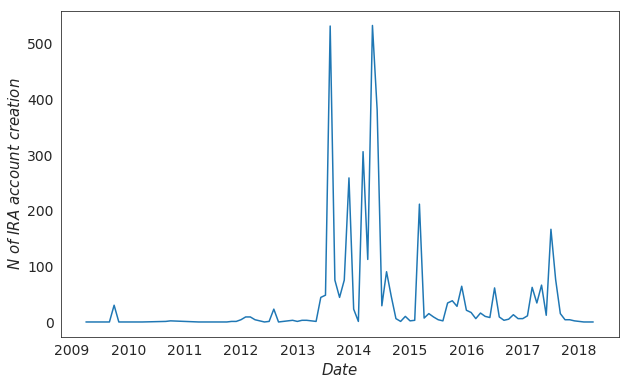

In [16]:
plt.figure(figsize=(10, 6))
# plt.plot_date(B.index, B['userid'])
B['userid'].plot()
plt.xlabel('$Date$', fontsize=15); plt.ylabel('$N\ of\ IRA\ account\ creation$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/account_creation.pdf', dpi=300)
plt.show()

B.to_csv('account_creation.csv')

In [22]:
# load tweets

%time tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', low_memory=False)
tweets.head()

CPU times: user 1min 13s, sys: 5.09 s, total: 1min 18s
Wall time: 1min 18s


tweetid                                             userid  \
0  877919995476496385  249064136b1c5cb00a705316ab73dd9b53785748ab757f...   
1  492388766930444288  0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...   
2  719455077589721089  bda40f262856eee77c48a332e5eb23bc4f1943d600867d...   
3  536179342423105537  bda40f262856eee77c48a332e5eb23bc4f1943d600867d...   
4  841410788409630720  a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...   

                                   user_display_name  \
0  249064136b1c5cb00a705316ab73dd9b53785748ab757f...   
1  0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...   
2  bda40f262856eee77c48a332e5eb23bc4f1943d600867d...   
3  bda40f262856eee77c48a332e5eb23bc4f1943d600867d...   
4  a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...   

                                    user_screen_name user_reported_location  \
0  249064136b1c5cb00a705316ab73dd9b53785748ab757f...         Москва, Россия   
1  0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...                 Россия   
2  bda40f262856eee77c48a332e5eb23bc4f1943d600867d...                 Рязань   
3  bda40f262856eee77c48a332e5eb23bc4f1943d600867d...                 Рязань   
4  a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...                    NaN   

                            user_profile_description        user_profile_url  \
0                              Я примерный семьянин!                     NaN   
1  Телефонист .Изучение истории   Игра в любитель...                     NaN   
2               волны так и плещут фиолетовой волной                     NaN   
3               волны так и плещут фиолетовой волной                     NaN   
4                 Отвечаю на любой #ВопросПрезиденту  http://t.co/3CVqbMQFbf   

   follower_count  following_count account_creation_date     ...       \
0             132              120            2013-12-07     ...        
1              74                8            2014-03-15     ...        
2             165              454            2014-04-29     ...        
3             165              454            2014-04-29     ...        
4            4430             4413            2012-02-25     ...        

  latitude longitude quote_count reply_count like_count  retweet_count  \
0      NaN       NaN         0.0         0.0        0.0            0.0   
1      NaN       NaN         0.0         0.0        0.0            0.0   
2      NaN       NaN         0.0         0.0        0.0            0.0   
3      NaN       NaN         0.0         0.0        0.0            0.0   
4      NaN       NaN         0.0         0.0        3.0            4.0   

     hashtags                                           urls  user_mentions  \
0          []   [http://ru-open.livejournal.com/374284.html]   [2572896396]   
1         NaN  [http://pyypilg33.livejournal.com/11069.html]            NaN   
2          []  [https://www.youtube.com/watch?v=9GvpImWxTJc]     [40807205]   
3  [STOPNazi]                                            NaN            NaN   
4          []                        [https://goo.gl/fBp94X]            NaN   

  poll_choices  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 31 columns]

In [26]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [3]:
tweets.describe()

tweetid  follower_count  following_count  in_reply_to_tweetid  \
count  9.041308e+06    9.041308e+06     9.041308e+06         2.662080e+05   
mean   6.403835e+17    8.670202e+03     2.522468e+03         6.111953e+17   
std    1.550236e+17    2.214639e+04     5.028831e+03         1.334171e+17   
min    1.747086e+09    0.000000e+00     0.000000e+00         0.000000e+00   
25%    5.267902e+17    3.460000e+02     2.840000e+02         5.730938e+17   
50%    6.221623e+17    8.420000e+02     6.180000e+02         6.325940e+17   
75%    7.800047e+17    4.486000e+03     2.014000e+03         6.568322e+17   
max    1.009806e+18    2.576380e+05     7.466400e+04         1.001021e+18   

       quoted_tweet_tweetid  retweet_tweetid     latitude    longitude  \
count          1.879130e+05     3.333184e+06  4779.000000  4779.000000   
mean           7.965433e+17     6.711430e+17    53.958520    61.841277   
std            8.698341e+16     1.232434e+17    12.332756    22.985006   
min            1.834783e+09     1.000000e+02   -43.323251  -115.148349   
25%            7.742985e+17     5.710871e+17    55.038939    37.660071   
50%            8.102428e+17     6.531061e+17    55.039231    73.275546   
75%            8.500103e+17     7.946743e+17    56.367504    73.279744   
max            9.989833e+17     1.001554e+18    61.879338   171.602940   

        quote_count   reply_count    like_count  retweet_count  
count  9.038635e+06  9.038635e+06  9.038635e+06   9.038635e+06  
mean   1.981891e-01  2.810441e-01  4.002723e+00   3.457440e+00  
std    1.307364e+01  7.408997e+00  2.903125e+02   1.403270e+02  
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
max    1.163300e+04  3.249000e+03  3.258260e+05   1.236170e+05

In [15]:
# user_data['account_creation_date'] = pd.to_datetime(user_data['account_creation_date'])
tweets['tweet_time'] = pd.to_datetime(tweets['tweet_time'])

A = tweets.set_index('tweet_time')
B = A.to_period('M').groupby('tweet_time').count()

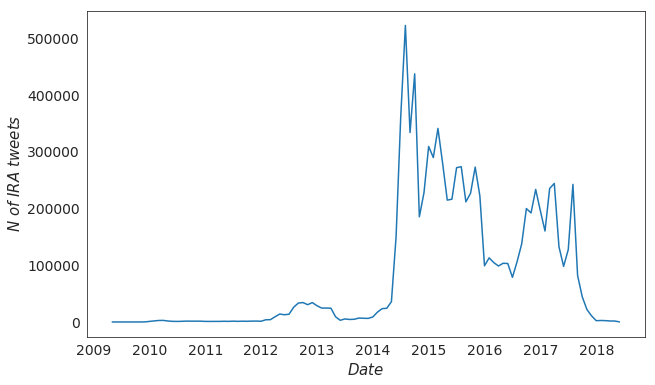

In [19]:
plt.figure(figsize=(10, 6))
# plt.plot_date(B.index, B['userid'])
B['tweetid'].plot()
plt.xlabel('$Date$', fontsize=15); plt.ylabel('$N\ of\ IRA\ tweets$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/tweet_creation.pdf', dpi=300)
plt.show()

B['tweetid'].to_csv('tweet_creation.csv')

In [31]:
from urllib.parse import urlparse
import requests

for i, row in tweets.iterrows():
    if not isinstance(row['urls'], str):
        tweets.drop(i)
    elif row['urls'][1: -1] == '':
        tweets.drop(i)
    else:
        url = row['urls'][1: -1]
        res = requests.head(url)
        hostname = urlparse(res.headers.get('location')).hostname
        if hostname:
            print(i, url, '>', hostname)
        else:
            tweets.drop(i)
        break
        
#     print(row)
#     if isinstance(urls, str):
#         url = urls[1: -1]
#         if url:
# #             hostname = urllib.parse.urlparse(url).hostname
#             res = requests.head(url)
#             hostname = urlparse(res.headers.get('location')).hostname
#             if hostname:
#                 print(hostname, type(hostname))



0 http://ru-open.livejournal.com/374284.html > ru-open.livejournal.com


In [47]:
# build retweet networks

userid_map = json.load(open("data/userid_mapping.json"))
G = nx.DiGraph()
G.add_nodes_from(userid_map.values())
# G.number_of_nodes()

for i, row in tweets.iterrows():
    if row["is_retweet"]:
        if row['retweet_userid'] in userid_map:
            ret_userid = userid_map[row['retweet_userid']]
            userid = userid_map[row['userid']]
            if ret_userid != userid:
                G.add_edge(ret_userid, userid)

# save the network
nx.readwrite.adjlist.write_adjlist(G, 'retweet_net_in_IRA.dat')

In [21]:
G = nx.readwrite.adjlist.read_adjlist('retweet_net_in_IRA.dat')

In [48]:
G.number_of_nodes()

3836

In [49]:
G.number_of_edges()

168074

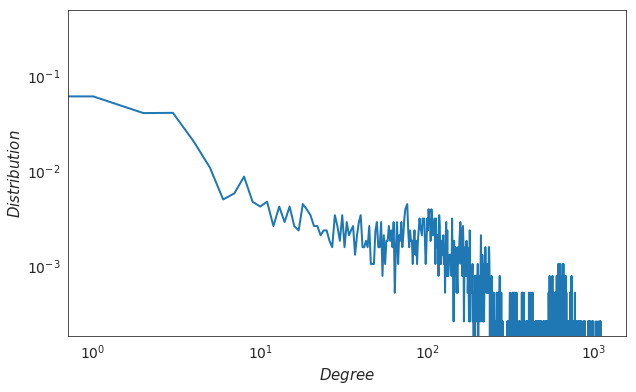

0 76
1 236
14 633
21 656
22 676
104 682
372 700
836 702
857 838
986 944
1020 1027
2168 1084
2274 1088
3585 1092


KeyError: 3585

In [66]:
plt.figure(figsize=(10, 6))

degree = nx.degree_histogram(G)
x = range(len(degree))                             
y = [z / float(sum(degree)) for z in degree]  
plt.loglog(x, y, linewidth=2)
plt.xlabel('$Degree$', fontsize=15); plt.ylabel('$Distribution$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/degree_distribution.pdf', dpi=300)
plt.show()

d = dict(G.degree())
n, de = 0, 0
for k, v in d.items():
    if v > de:
        print(k, v)
        n, de = k, v
        
userid_map = json.load(open("data/userid_mapping.json"))
userid_map[n]

33162


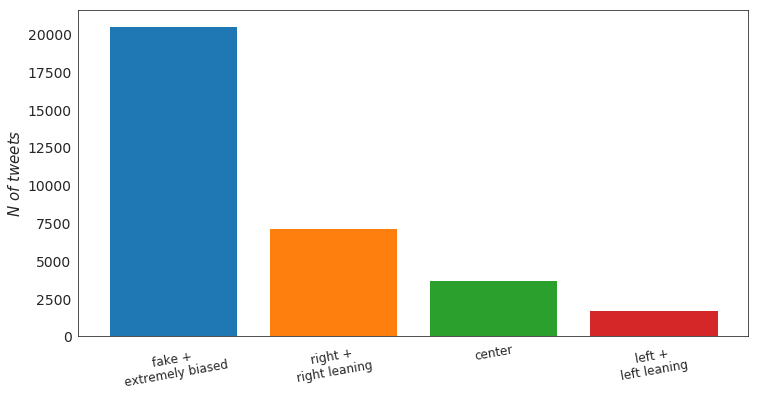

In [59]:
plt.figure(figsize=(12, 6))
x = [11638 + 8910, 42 + 7102, 3707, 1042 + 721]
print(sum(x))
label = ['fake +\n extremely biased', 'right +\nright leaning', 'center', 'left +\nleft leaning']
plt.bar(1, x[0])
plt.bar(2, x[1])
plt.bar(3, x[2])
plt.bar(4, x[3])
plt.xticks([1, 2, 3, 4], label, rotation=10)
plt.ylabel('$N\ of\ tweets$', fontsize=15)
plt.xticks(fontsize=12); plt.yticks(fontsize=14)
plt.savefig('fig/fake_news_bar.pdf', dpi=300)
plt.show()


发现了一些匿名的用户的真实id，但是非常的少；

位置：data/IRAs_be_found.json，仅仅命中了21857

3836个用户中匿名有3669个；

## 如何判断一个人是不是IRAs？

所以我要创造一个UID of IRAs 


In [15]:
uids_of_IRA = set(json.load(open("data/IRA_match.json")).values())

In [ ]:
# 关键词选择出与 分析 相关的数据，主要是election, trump, hillary

In [35]:
trump_count = 0
hillary_count = 0
election_count = 0

for i, row in tweets.iterrows():
    if i % 100000 == 0:
        print(i)
    words = set(str(row["tweet_text"]).lower().strip().split())
    if "trump" in words or "realdonaldtrump" in words or "@realdonaldtrump" in words or "donaldtrump" in words:
        trump_count += 1
    if "hillary" in words or "clinton" in words or "hillaryclinton" in words or "@hillaryclinton" in words:
        hillary_count += 1
    if "election" in words:
        election_count += 1

trump_count, hillary_count, election_count

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000


(144493, 50958, 9749)